In [1]:
import os
import sys
sys.path.append(os.getcwd())

import restools
from comsdk.research import Research
from skesn.esn import EsnForecaster

import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd

In [2]:
res = Research.open('RC_MOEHLIS')

Loaded research at C:\Users\ovann\Documents\Researches\2021-04-30-predicting-transition-to-turbulence-using-esn
Number of tasks in the current research: 56


In [36]:
t = {
    42:'Esn',
    46:'Esn train min len',
    47:'Esn train max len',
    48:'Esn train 1954 len',
    49:'Esn train max len-10_000',
    50:'Esn train max len unuse bias',

    51:'Esn train 1954 len-15_000',
    52:'Esn train 1954 len-15_000 unuse bias',

    53:'Esn train 1954 len-15_000 unuse bias noise',
    54:'Esn train 1954 len-15_000 unuse bias None',
    55:'Esn train 1954 len-15_000 use bias noise',
    56:'Esn train 1954 len-15_000 use bias None',
    
    57: 'Esn train 1954 len-15_000 unuse bias noise 01',
    58: 'Esn train 1954 len-15_000 use bias noise 01'
    
}

In [39]:
task_num = 55
data5 = []
time = []
n_files = 100

for num_data in range(n_files):
    with open(os.path.join(res.get_task_path(task_num), str(num_data+1)), 'rb') as a:
        b = pickle.load(a)
    data5.append(b['timeseries'])
    time.append(b['time'])

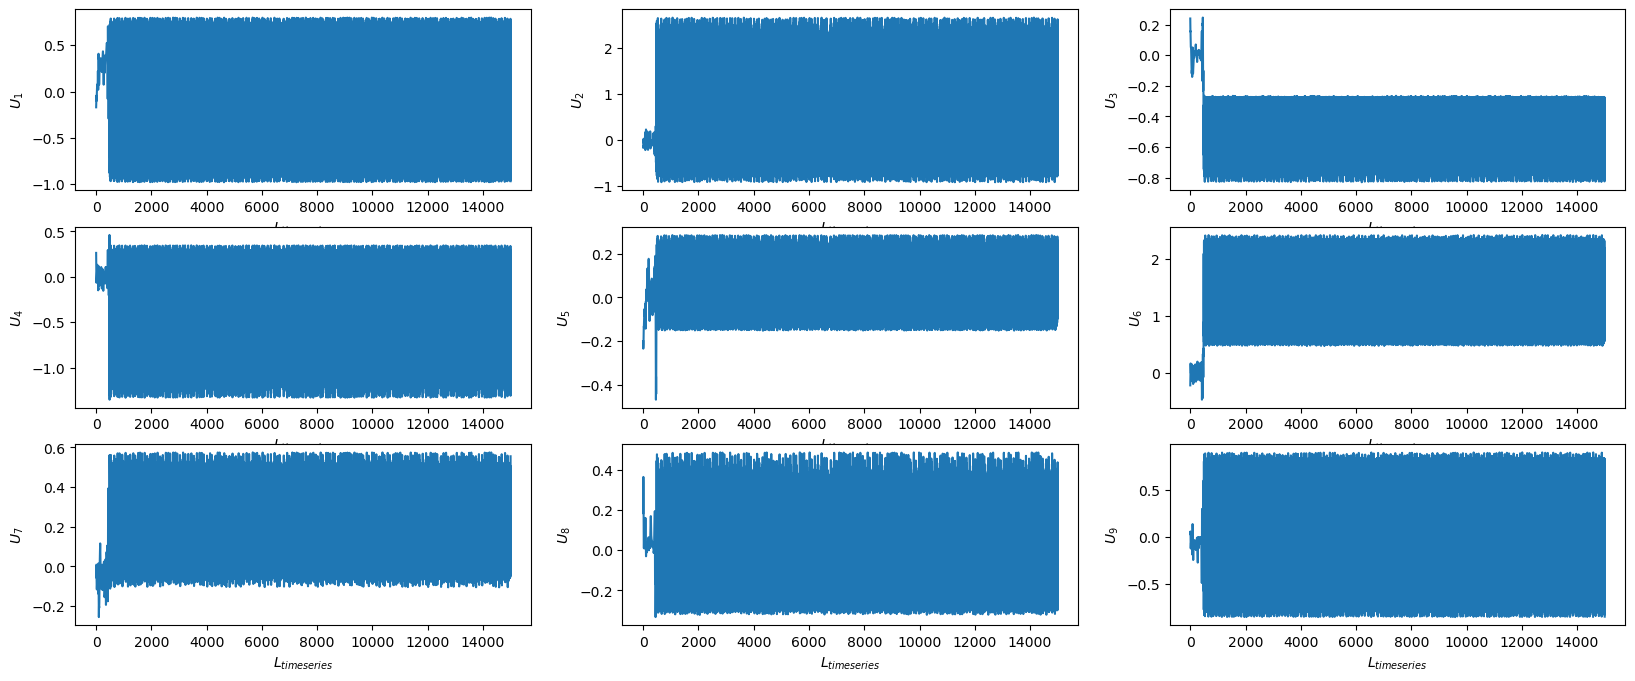

In [44]:
plt.figure(figsize=(20,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.plot(np.array(data5[0])[:, i], '-');
    plt.xlabel(fr'$L_{"{timeseries}"}$')
    plt.ylabel(fr'$U_{i+1}$')
    #plt.semilogx()

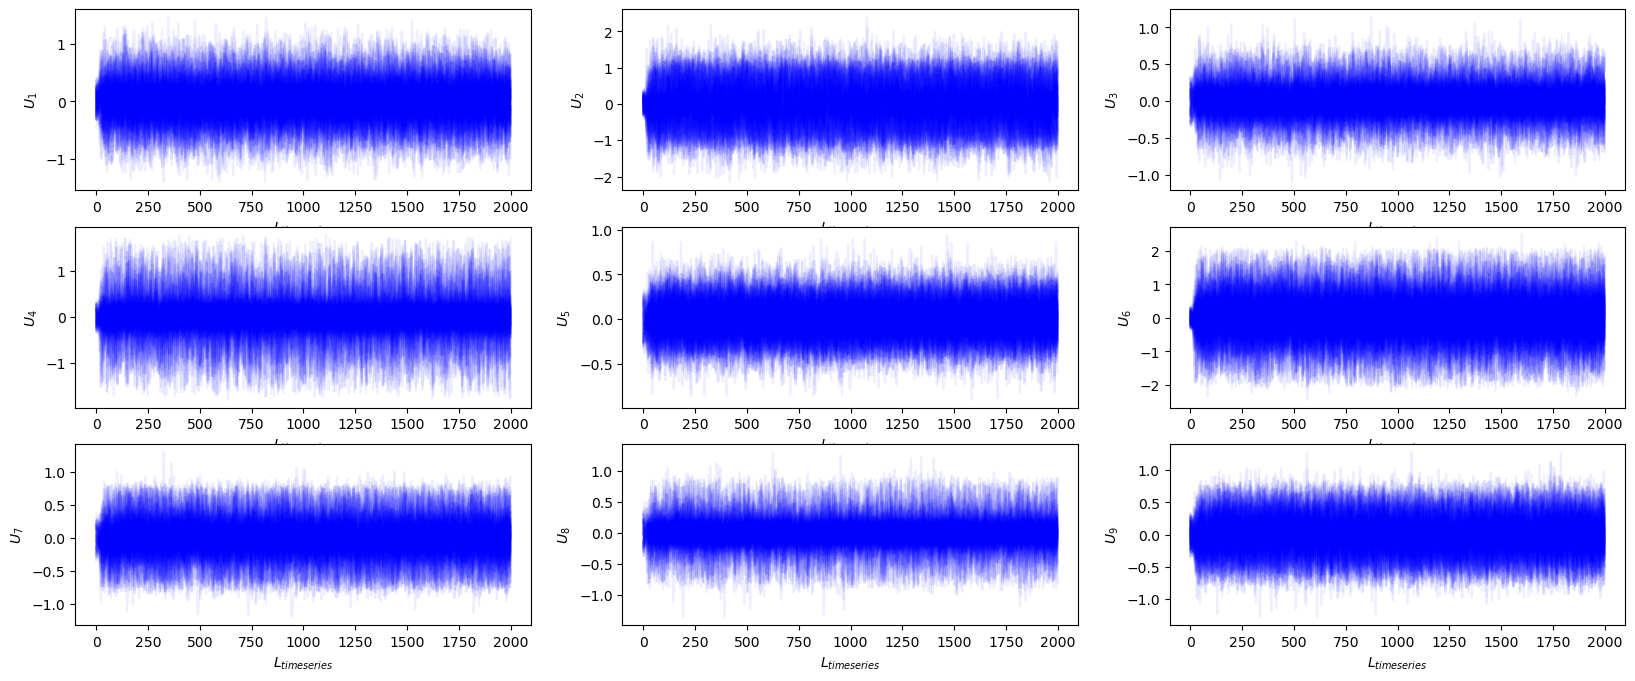

In [32]:
plt.figure(figsize=(20,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    for j in range(100):
        plt.plot(
            np.array(data5[j])[:, i], 
            '-',
            color='#0000FF11'
            );
    plt.xlabel(fr'$L_{"{timeseries}"}$')
    plt.ylabel(fr'$U_{i+1}$')
    #plt.semilogx()

In [60]:
task_num = 42
data = []
time = []
n_files = 100

for num_data in range(n_files):
    with open(os.path.join(res.get_task_path(task_num), str(num_data+1)), 'rb') as a:
        b = pickle.load(a)
    data.append(b['timeseries'])
    time.append(b['time'])

In [61]:
t = {
    42: 'Esn',
    #46:'Esn train min len',
    #47:'Esn train max len',
    #48:'Esn train 1954 len',
    #49:'Esn train max len-10_000',
    #50:'Esn train max len unuse bias',
    51:'Esn train 1954 len-15_000',
    52:'Esn train 1954 len-15_000 unuse bias',
    53:'Esn train 1954 len-15_000 unuse bias noise',
    54:'Esn train 1954 len-15_000 unuse bias None',
}

#esn_name = f'esn_max_len_unuse_bias'
#esn_name = f'esn_max_len'
#esn_name = f'esn_min_len'
#esn_name = f'esn_1954_len'
#esn_name = f'esn_1954_len_unuse_bias'
#esn_name = f'esn_1954_len_unuse_bias_additive_noise_when_forecasting'
#esn_name = f'esn_1954_len_unuse_bias_reg-noise'
esn_name = f'esn_1954_len_unuse_bias_reg-None'
#esn_name = 'esn_trained_wo_lam_event'

In [62]:
url = r'C:\Users\ovann\Jupyter Notebook\7sem\VKR'
esn_name1 = f'esn_1954_len'
esn_name2 = f'esn_1954_len_unuse_bias'

In [63]:
#with open(os.path.join(url, esn_name), 'rb') as e:
#    esn = pickle.load(e)
#esn

In [64]:
n = 76
datalen = len(time[n])
trainlen = int(len(time[n])*0.8)
testlen = datalen - trainlen

training_timeseries = data[n][:trainlen]
test_timeseries_set = [data[n][trainlen:]]
spectral_radius_values = [0.5]
sparsity_values = [0.1]

In [65]:
esn1 = EsnForecaster(
    n_reservoir=1500,
    spectral_radius=spectral_radius_values[0],
    sparsity=sparsity_values[0],
    regularization='noise',
    lambda_r=0.001,
    random_state=42,
    use_bias=True
)

esn1.fit(training_timeseries)

esn2 = EsnForecaster(
    n_reservoir=1500,
    spectral_radius=spectral_radius_values[0],
    sparsity=sparsity_values[0],
    regularization='noise',
    lambda_r=0.001,
    random_state=42,
    use_bias=False
)

esn2.fit(training_timeseries)

EsnForecaster(n_reservoir=1500, random_state=42, sparsity=0.1,
              spectral_radius=0.5, use_bias=False)

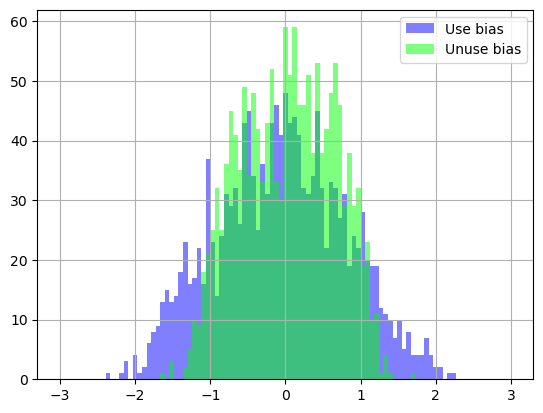

In [66]:
bins = np.linspace(-3, 3, 100)

plt.hist(esn1.preactivation, bins=bins, fc=(0, 0, 1, 0.5), label='Use bias');
plt.hist(esn2.preactivation, bins=bins, fc=(0, 1, 0, 0.5), label='Unuse bias');
#plt.hist(model1.preactivation, bins=bins, fc=(0, 0, 1, 0.5), label='Max timseries len preactivation');
plt.legend()
plt.grid()

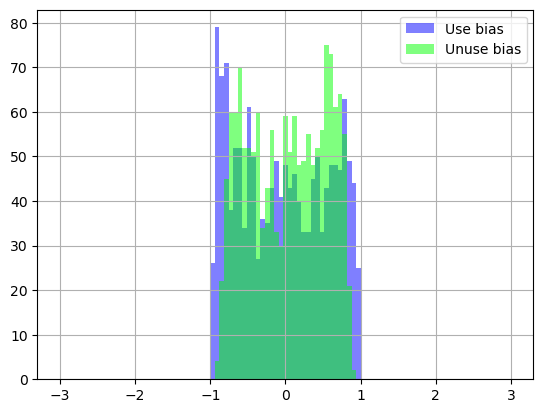

In [67]:
bins = np.linspace(-3, 3, 100)

plt.hist(np.tanh(esn1.preactivation), bins=bins, fc=(0, 0, 1, 0.5), label='Use bias');
plt.hist(np.tanh(esn2.preactivation), bins=bins, fc=(0, 1, 0, 0.5), label='Unuse bias');
#plt.hist(model1.preactivation, bins=bins, fc=(0, 0, 1, 0.5), label='Max timseries len preactivation');
plt.legend()
plt.grid()

In [33]:
esn1.in_activation

'tanh'